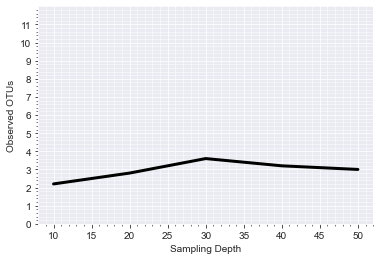

Outputing chart: rarefaction_50


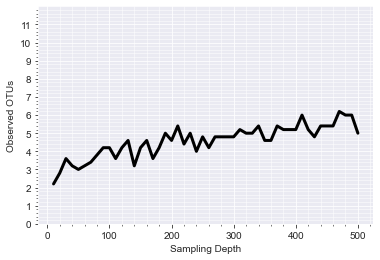

Outputing chart: rarefaction_500


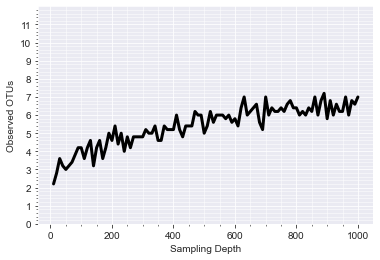

Outputing chart: rarefaction_1000


In [17]:
# Importing libraries and functions we'll need

%matplotlib inline
from random import choice
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from math import log

def make_microbiome(total=10000000,common=0.70,uncommon=0.25,rare=0.04,very_rare=0.004,\
    uber_rare=0.0004,most_rare=0.00001):
    """Return a simulated microbiome as a list of species
    NOTE: this is just a simple demo real simulations would use a
    specific distribution of rare vs. abundant species

    """
    microbiome = ['species1']*int(common*total)+\
      ['species2']*int(uncommon*total)+\
      ['species3']*int(rare*total)+\
      ['species4']*int(very_rare*total)+\
      ['species5']*int(very_rare*total)+\
      ['species6']*int(uber_rare*total)+\
      ['species7']*int(uber_rare*total)+\
      ['species8']*int(uber_rare*total)+\
      ['species9']*int(uber_rare*total)+\
      ['species10']*int(uber_rare*total)+\
      ['species11']*int(most_rare*total)

    return microbiome


def sample_microbiome(microbiome,depth):
    """Return a dict of species:count by selection species at random from a list of species
    microbiome -- a list of strings representing species
      example: ['species1','species1','species1','species2', etc]
    depth -- depth to sample as int
    """
    counts = defaultdict(int)
    for i in range(depth):
        read = (choice(microbiome))
        counts[read] += 1
    return counts



def obs_species(counts):
    """Returns the number of observed species
    counts -- defaultdict of species counts"""
    return(len(counts))

# Exercise 2: edited rarefaction_graph function
def rarefaction_graph(x,y,outfile="rarefaction.png",fontsize=16,font="Arial"):
    """Graph species vs. sampling effort
    x -- a list of x values
    y -- a list of y values
    outfile -- path to save the graph.  Note that the .png extension is important, as matplotlib
    guesses output filetype based on suffix

    Hat tip to Stack Overflow on an elegant stategy for adjusting font sizes:
    http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
    """
    ax =plt.subplot()

    #Plot the results simple black line
    plt.plot(x,y,c='black',linestyle='-',linewidth=3.0)

    #Turn on minor ticks so you can see our minor gridlines
    plt.minorticks_on()
    plt.grid(visible=True, which='minor', color='white', linestyle='-',linewidth=0.5)

    # ax.set_ylim([0,12])
    # Set yticks to one Exercise 4:
    plt.yticks(np.arange(0, 12, 1.0))

    #Show ticks just on bottom left
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.ylabel('Observed OTUs')
    plt.xlabel('Sampling Depth')
    plt.savefig(outfile)
    plt.show()

if __name__ == "__main__":
    #This script simulates sampling from microbiomes of various
    #depths, then makes horrible graphs representing them.
    #Your task is to fix the rarefaction_graph function so that
    #the graphs are less awful.

    #Generate a list of strings representing a microbiome
    microbiome = make_microbiome(total=1000000)


    graph_depths = [50,500,1000,50]
    sampling_depths = range(10,1010,10)
    x = []
    y = []
    iterations = 5
    for sampling_depth in sampling_depths:
        curr_counts = []
        for i in range(iterations):
            microbiome_sample = sample_microbiome(microbiome,sampling_depth)
            curr_count = obs_species(microbiome_sample)
            curr_counts.append(curr_count)
        counts = sum(curr_counts)/len(curr_counts)
        x.append(sampling_depth)
        y.append(counts)
        if sampling_depth in graph_depths:
            rarefaction_graph(x,y,outfile="rarefaction_%i"%sampling_depth)
            print("Outputing chart: rarefaction_%i"%sampling_depth)

1. What principles for the visual display of quantitative information do our graphs violate?

    Induce reader to think about findings rather than methodology, graphic design - graphs hinder readers ability to think about findings as the graphical design proves to be distracting.
    Avoiding distorting what the data has to say - fonts and lines have different sizes giving unnecessary emphasis to certain bits.
    Make large datasets coherent - large dataset is not easily understandable from the graph. Colors hide the graph lines and axis labels are different sizes.
    Serve clear purpose - graphs purpose is unclear with all the design and colors.
    Reveal data at several levels - graphs hinder ability to observe data at a basic lavel.


2. Revise the chart to better display the data, and save your code.

3. Using your revised graphs as a reference, answer the following. You are reading an older publication that found a two-fold difference in species richness between two environments, A and B, with B having about double the observed species diversity of A. However, there is a difference in average sequencing depth between the two: A has on average only 50 sequences per sample, while B has about 1000. From this information, what can you conclude about the species richness of the real biological communities in environment A and B?

    From this we might be able to conclude that biome A may have a higher species richness than the current observed species and in this case may have the same species richness as B. From the fixed plots, we can observe that at 50 sequence depth the observed species is around 3 and at 1000 sequence depth the observed species is around 6-7. Based on this, we might conclude that if A had 1000 sequences per sample then it might have an observed species of around 6-7 if the graph trend is accurate.

4. Aside from the formatting details, do you think there are aspects of the simulation or overall graphing approach that would better communicate how sequencing depth (the number of DNA sequences collected per sample) affects perceived microbiome diversity?

    I thought that the yticks incrementing by 2 was perhaps not the most helpful and should be increment by 1 since the ylimit is not that high.
    It also might be nice to have dots at each sampling depth (if possible) - this would potentially make extrapolating values easier.


5. Try implementing one of your ideas from Exercise 4, and compare your rewritten version to the revised chart in step 2. Did it improve matters? Were there tradeoffs in what you were showing?

    By implementing yticks of 1, it is easier to estimate the values of the graph, however it comes at the cost of being slightly smaller in scale which may impact readability.
